In [12]:
import  random
import re 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from googletrans import Translator
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
translator = Translator()


In [2]:
def generate_rand(len,start,end):
    ls = []
    for i in range(len):
        ls.append(random.randint(start,end))
    return ls

def first_digit(num):
    match = re.search(r'\d', str(num))
    digit = int(match.group())
    return -digit if (num < 0) else digit

In [3]:
def verify_benford(arr):
    fls = []
    l = len(arr)
    for i in arr:
        fls.append(first_digit(i))
    return fls

<Axes: xlabel='digit', ylabel='count'>

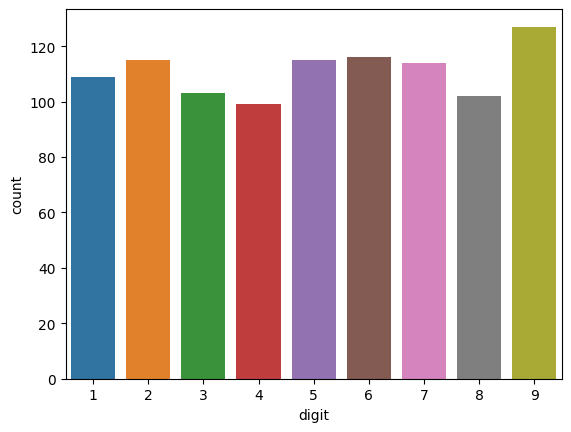

In [4]:
l=generate_rand(1000,1,9999999)
x = verify_benford(l)
df = pd.DataFrame(x,columns=['digit'],dtype=int,index=None)
df = df.astype({'digit': 'int64'})
df = df.reindex(columns=['digit'])
df = df.groupby('digit').size().reset_index(name='count')
sns.barplot(x='digit',y='count',data=df)

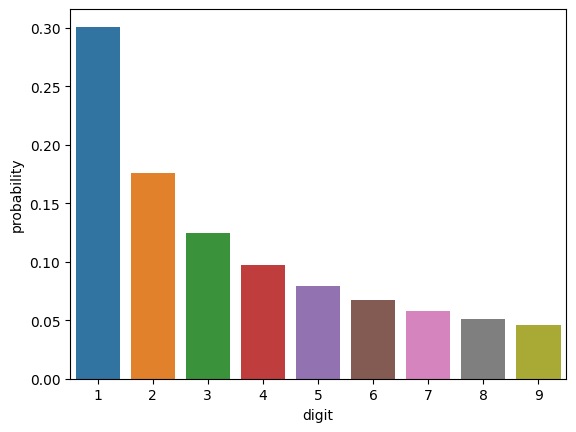

In [5]:


# plot the probability of the first digit of a number
def plot_benford():
    df = pd.DataFrame({'digit': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                       'probability': [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]})
    sns.barplot(x='digit', y='probability', data=df)
    plt.show()

plot_benford()

In [6]:
def add_benford_pdf(df):
    df['benford_pdf'] = df['digit'].apply(lambda x: 0.301 if x == 1 else 0.176 if x == 2 else 0.125 if x == 3 else 0.097 if x == 4 else 0.079 if x == 5 else 0.067 if x == 6 else 0.058 if x == 7 else 0.051 if x == 8 else 0.046 if x == 9 else 0)
    df['obtained_pdf'] = df['count'] / df['count'].sum()
    df['difference'] = df['obtained_pdf'] - df['benford_pdf']
    return df
df = add_benford_pdf(df)
df


,digit,count,benford_pdf,obtained_pdf,difference
0,1,109,0.301,0.109,-0.192
1,2,115,0.176,0.115,-0.061
2,3,103,0.125,0.103,-0.022
3,4,99,0.097,0.099,0.002
4,5,115,0.079,0.115,0.036
5,6,116,0.067,0.116,0.049
6,7,114,0.058,0.114,0.056
7,8,102,0.051,0.102,0.051
8,9,127,0.046,0.127,0.081


<Axes: xlabel='digit', ylabel='obtained_pdf'>

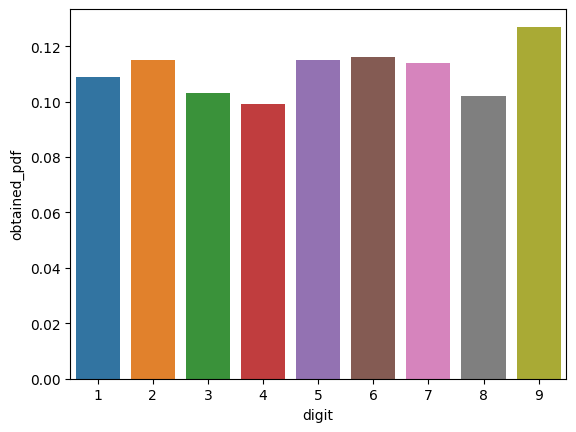

In [7]:
sns.barplot(x='digit', y='obtained_pdf', data=df)

<Axes: xlabel='digit', ylabel='difference'>

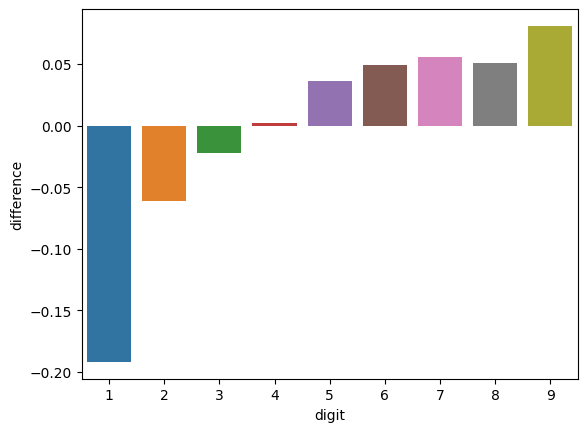

In [8]:
sns.barplot(x='digit', y='difference', data=df)

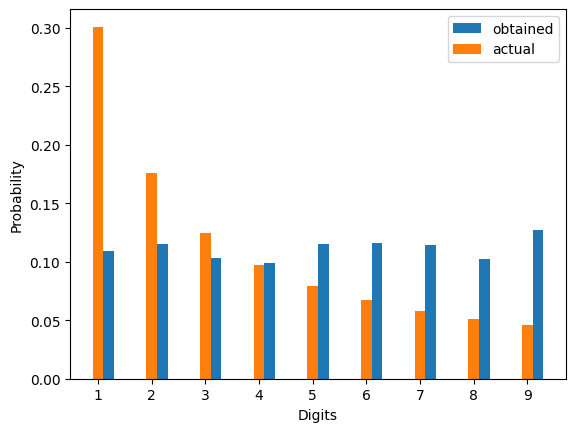

In [9]:
x = df['digit']
obtained = df['obtained_pdf']
actual = df['benford_pdf']

X_axis = np.arange(len(x))

plt.bar(X_axis+0.2,obtained, 0.2, label = 'obtained')
plt.bar(X_axis,actual, 0.2, label = 'actual')
plt.xticks(X_axis, x)
plt.xlabel("Digits")
plt.ylabel("Probability")
plt.legend()
plt.show()

##### If a certain set of values follows Benford's Law then model's for the corresponding predicted values should also follow Benford's Law.
##### Manipulated or fraudulent data do not trend to confirm to Benford's Law, whereas unmanipulated data do.
##### This is a simple demonstration of how to use the Benford's Law test to detect manipulated data.

#### Russia Prsidential Election 2018

In [17]:
data = pd.read_csv('./uiks-utf8.csv')
print(data.columns)
data['Kalpi'] = 1

Index(['region_name', 'tik_name', 'uik_name', 'registered_voters',
       'received_ballots', 'early_voting_ballots', 'onsite_ballots',
       'offsite_ballots', 'unused_ballots', 'found_offsite_ballots',
       'found_onsite_ballots', 'invalid_ballots', 'valid_ballots',
       'lost_ballots', 'unaccounted_ballots', 'baburin', 'grudinin',
       'zhirinovsky', 'putin', 'sobchak', 'suraykin', 'titov', 'yavlinsky'],
      dtype='object')


In [15]:
registered_to_vote = np.sum(data['registered_voters'])
valid_votes = np.sum(data['valid_ballots'])
print('Total registered to vote: ', format(registered_to_vote,',d'))
print('Valid counted votes: {:,.0f} wich is {:.2%}. (According to official results: 67.5%)'.format(valid_votes,valid_votes/registered_to_vote))
print('Number of regions: ',len(set(data['region_name'])))

Total registered to vote:  109,024,062
Valid counted votes: 72,796,250 wich is 66.77%. (According to official results: 67.5%)
Number of regions:  87


In [19]:
regions_sum = data.groupby(['region_name'])[['Kalpi','registered_voters','valid_ballots']].sum()
regions_sum['Votes_per'] = (regions_sum['valid_ballots']/regions_sum['registered_voters'])*100
regions_sum['Region_weight'] = (regions_sum['valid_ballots']/valid_votes)*100
print('5 top regions by votes percentage:')
regions_sum.sort_values('Votes_per',ascending=False).head()

5 top regions by votes percentage:


,Kalpi,registered_voters,valid_ballots,Votes_per,Region_weight
region_name,,,,,
99 Территория за пределами РФ,394,493139,469542,95.214939,0.645008
Республика Тыва,183,175102,162780,92.962959,0.223610
Кабардино-Балкарская Республика,354,528431,483932,91.579033,0.664776
Ямало-Ненецкий автономный округ,228,370823,338067,91.166675,0.464402
Чеченская Республика,475,709635,646885,91.157426,0.888624


In [20]:
print('5 bottom regions by votes percentage:')
regions_sum.sort_values('Votes_per',ascending=False).tail()

5 bottom regions by votes percentage:


,Kalpi,registered_voters,valid_ballots,Votes_per,Region_weight
region_name,,,,,
Забайкальский край,942,790054,452268,57.245201,0.621279
Тверская область,1218,1070221,609914,56.989538,0.837837
Новгородская область,544,502905,284614,56.593989,0.390973
Республика Карелия,470,519667,293309,56.441721,0.402918
Иркутская область,1916,1877547,1033973,55.070419,1.420366


<Axes: >

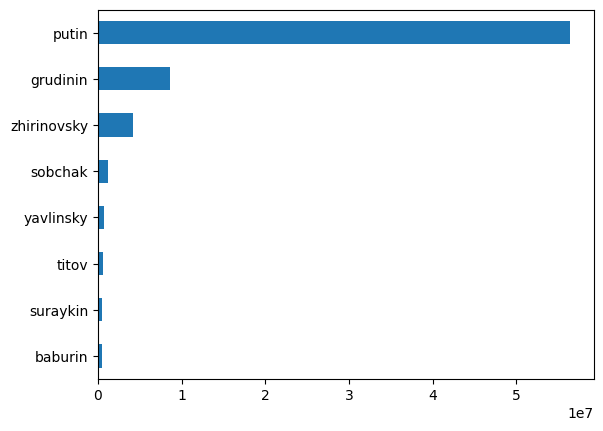

In [21]:
candidates = ['baburin','grudinin','zhirinovsky','putin','sobchak','suraykin','titov','yavlinsky']
data[candidates].sum().sort_values(ascending = True).plot(kind = 'barh')

In [22]:
##  Apply Benford's law to each candidate and plot the results

def benford_plot(data, candidate):
    df = data[['Kalpi',candidate]]
    df = df[df[candidate] > 0]
    df['digit'] = df[candidate].apply(first_digit)
    df = df.groupby('digit').size().reset_index(name='count')
    df = add_benford_pdf(df)
    df = df.sort_values('digit')
    df['candidate'] = candidate
    return df

df = pd.DataFrame()
for candidate in candidates:
    df = df.append(benford_plot(data, candidate))

df = df.reset_index(drop=True)
df

,digit,count,benford_pdf,obtained_pdf,difference,candidate
0,1,28837,0.301,0.368760,0.067760,baburin
1,2,11196,0.176,0.143171,-0.032829,baburin
2,3,7987,0.125,0.102136,-0.022864,baburin
3,4,6606,0.097,0.084476,-0.012524,baburin
4,5,5867,0.079,0.075026,-0.003974,baburin
...,...,...,...,...,...,...
67,5,4566,0.079,0.065115,-0.013885,yavlinsky
68,6,3457,0.067,0.049300,-0.017700,yavlinsky
69,7,2947,0.058,0.042027,-0.015973,yavlinsky
70,8,2475,0.051,0.035296,-0.015704,yavlinsky


In [26]:
df = df.sort_values(['candidate','digit'])
df

,digit,count,benford_pdf,obtained_pdf,difference,candidate
0,1,28837,0.301,0.368760,0.067760,baburin
1,2,11196,0.176,0.143171,-0.032829,baburin
2,3,7987,0.125,0.102136,-0.022864,baburin
3,4,6606,0.097,0.084476,-0.012524,baburin
4,5,5867,0.079,0.075026,-0.003974,baburin
...,...,...,...,...,...,...
22,5,10581,0.079,0.110814,0.031814,zhirinovsky
23,6,9433,0.067,0.098791,0.031791,zhirinovsky
24,7,7795,0.058,0.081637,0.023637,zhirinovsky
25,8,6495,0.051,0.068022,0.017022,zhirinovsky


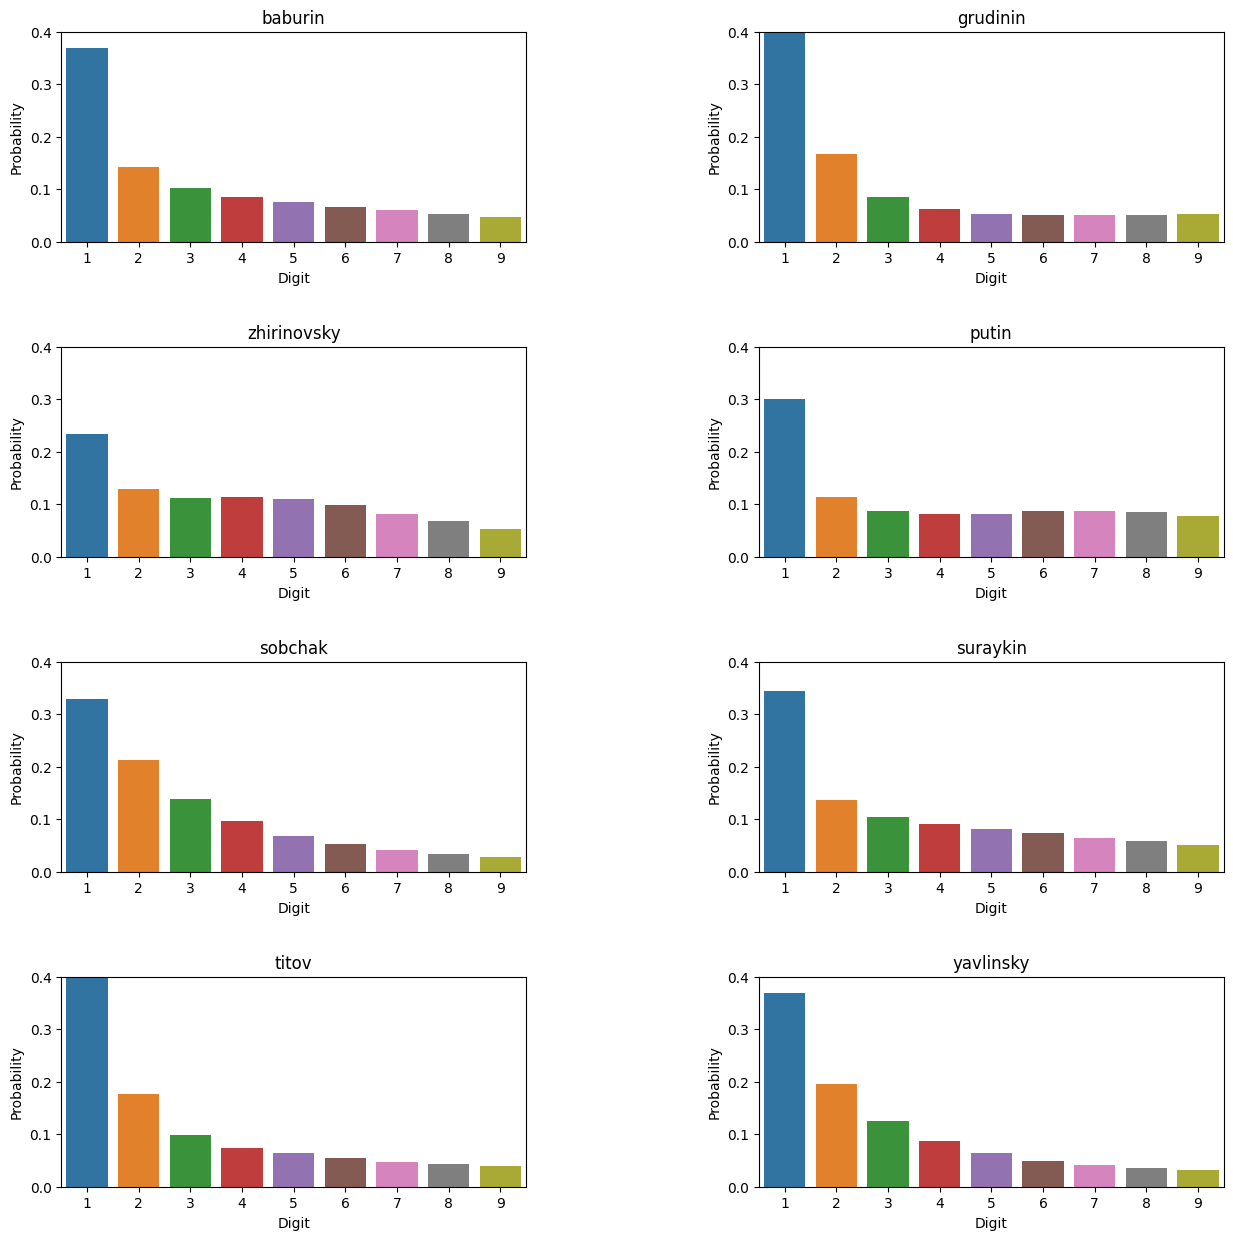

In [27]:
# subplots 
fig, ax = plt.subplots(4,2,figsize=(15,15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, candidate in enumerate(candidates):
    sns.barplot(x='digit', y='obtained_pdf', data=df[df['candidate'] == candidate], ax=ax[i//2,i%2])
    ax[i//2,i%2].set_title(candidate)
    ax[i//2,i%2].set_xlabel('Digit')
    ax[i//2,i%2].set_ylabel('Probability')
    ax[i//2,i%2].set_ylim(0,0.4)
    

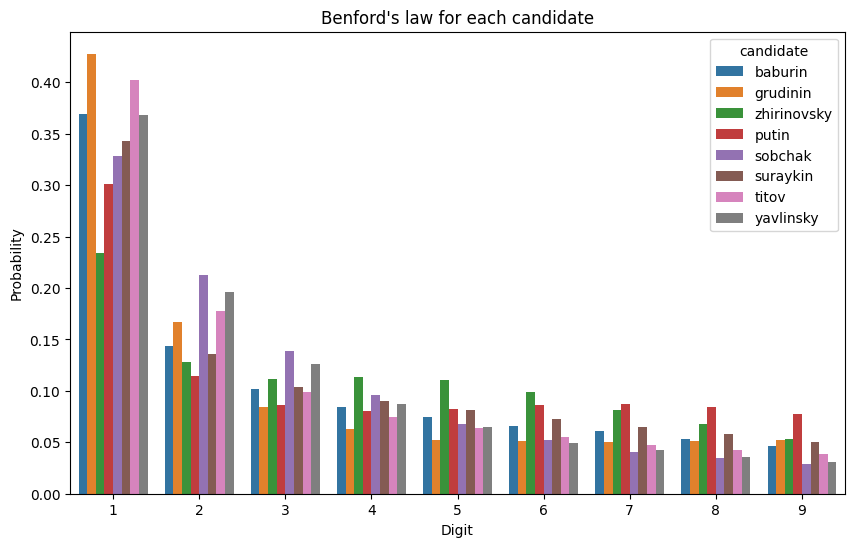

In [25]:
# Plot all candidates individually in one plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='digit', y='obtained_pdf', hue='candidate', data=df, ax=ax)
ax.set_title('Benford\'s law for each candidate')
ax.set_xlabel('Digit')
ax.set_ylabel('Probability')
plt.show()

<Axes: xlabel='digit', ylabel='obtained_pdf'>

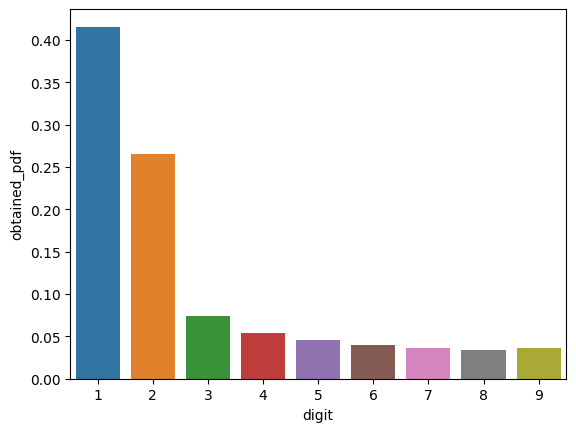

In [28]:
# Check Benford's law for all registered voters
df = benford_plot(data, 'registered_voters')
df
sns.barplot(x='digit', y='obtained_pdf', data=df)